In [137]:
# Import các thư viện sử dụng 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')
df.head()

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_35860\3660727059.py:10: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')


,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2


In [138]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['Churn'], axis=1)  # Loại bỏ cột customerID và cột target 'Churn'
y = df['Churn']

In [157]:
# Chia bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [159]:
# Các giá trị tham số cần thử nghiệm
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Khởi tạo mô hình GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình GridSearchCV
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với các tham số tốt nhất
nb_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = nb_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Best parameters found:  {'alpha': 0.1, 'fit_prior': True}
Accuracy: 0.7652626597255088


In [169]:
# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH CATEGORICAL NAIVE BAYES:')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}'' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

MÔ HÌNH CATEGORICAL NAIVE BAYES:
Accuracy: 76.53 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1533
           1       0.55      0.74      0.63       580

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.77      2113


Confusion Matrix:
[[1188  345]
 [ 151  429]]


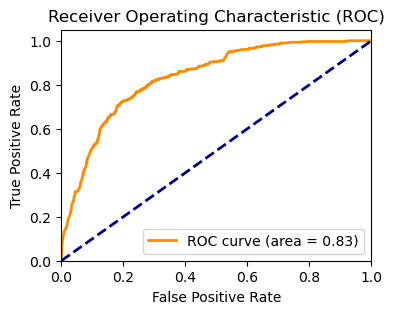

In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_test = X_test.astype(int)
# Dự đoán xác suất và tính toán ROC
y_scores = nb_model.predict_proba(X_test)[:, 1]  # Lấy xác suất của lớp positive
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()